# CycleGAN in TensorFlow 2.0

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

tf.enable_eager_execution()

In [2]:
# load data
dataset, metadata = tfds.load('cycle_gan/summer2winter_yosemite', with_info=True, as_supervised = True)
train_A, train_B = dataset['trainA'], dataset['trainB']
test_A, test_B = dataset['testA'], dataset['testB']


In [3]:
print(metadata)

tfds.core.DatasetInfo(
    name='cycle_gan',
    version=2.0.0,
    description='A dataset consisting of images from two classes A and B (For example: horses/zebras, apple/orange,...)',
    homepage='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=2740,
    splits={
        'testA': 309,
        'testB': 238,
        'trainA': 1231,
        'trainB': 962,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/ZhuPIE17,
      author    = {Jun{-}Yan Zhu and
                   Taesung Park and
                   Phillip Isola and
                   Alexei A. Efros},
      title     = {Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial
                   Networks},
      journal   = {CoRR},
      volume    = {abs/1703.10593},


In [4]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
EPOCHS = 50
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
# image normalization
def normalize(input_image, label):
    input_image = tf.cast(input_image, tf.float32)
    input_image = (input_image / 127.5) - 1
    return input_image

In [6]:
train_A = train_A.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_B = train_B.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_A = test_A.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_B = test_B.map(normalize, num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)



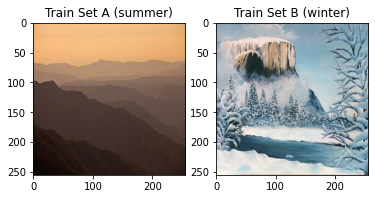

In [11]:
inpA = next(iter(train_A))
inpB = next(iter(train_B))
plt.subplot(121)
plt.title("Train Set A (summer)")
plt.imshow(inpA[0] *0.5 + 0.5)
plt.subplot(122)
plt.title("Train Set B (winter)")
plt.imshow(inpB[0] *0.5 + 0.5)
